In [1]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
from sklearn.datasets import load_breast_cancer,load_iris
import warnings
warnings.filterwarnings('ignore')

# Problem Statement 
### To predict the women having breast cancer or not .

# Data Gathering

In [2]:
breast_data = load_breast_cancer()

In [3]:
dir(breast_data)

['DESCR',
 'data',
 'data_module',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [4]:
df = pd.DataFrame(breast_data.data,columns = breast_data.feature_names)
df

mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0          17.99         10.38          122.80     1001.0          0.11840   
1          20.57         17.77          132.90     1326.0          0.08474   
2          19.69         21.25          130.00     1203.0          0.10960   
3          11.42         20.38           77.58      386.1          0.14250   
4          20.29         14.34          135.10     1297.0          0.10030   
..           ...           ...             ...        ...              ...   
564        21.56         22.39          142.00     1479.0          0.11100   
565        20.13         28.25          131.20     1261.0          0.09780   
566        16.60         28.08          108.30      858.1          0.08455   
567        20.60         29.33          140.10     1265.0          0.11780   
568         7.76         24.54           47.92      181.0          0.05263   

     mean compactness  mean concavity  mean concave points  mean symmetry  \
0             0.27760         0.30010              0.14710         0.2419   
1             0.07864         0.08690              0.07017         0.1812   
2             0.15990         0.19740              0.12790         0.2069   
3             0.28390         0.24140              0.10520         0.2597   
4             0.13280         0.19800              0.10430         0.1809   
..                ...             ...                  ...            ...   
564           0.11590         0.24390              0.13890         0.1726   
565           0.10340         0.14400              0.09791         0.1752   
566           0.10230         0.09251              0.05302         0.1590   
567           0.27700         0.35140              0.15200         0.2397   
568           0.04362         0.00000              0.00000         0.1587   

     mean fractal dimension  ...  worst radius  worst texture  \
0                   0.07871  ...        25.380          17.33   
1                   0.05667  ...        24.990          23.41   
2                   0.05999  ...        23.570          25.53   
3                   0.09744  ...        14.910          26.50   
4                   0.05883  ...        22.540          16.67   
..                      ...  ...           ...            ...   
564                 0.05623  ...        25.450          26.40   
565                 0.05533  ...        23.690          38.25   
566                 0.05648  ...        18.980          34.12   
567                 0.07016  ...        25.740          39.42   
568                 0.05884  ...         9.456          30.37   

     worst perimeter  worst area  worst smoothness  worst compactness  \
0             184.60      2019.0           0.16220            0.66560   
1             158.80      1956.0           0.12380            0.18660   
2             152.50      1709.0           0.14440            0.42450   
3              98.87       567.7           0.20980            0.86630   
4             152.20      1575.0           0.13740            0.20500   
..               ...         ...               ...                ...   
564           166.10      2027.0           0.14100            0.21130   
565           155.00      1731.0           0.11660            0.19220   
566           126.70      1124.0           0.11390            0.30940   
567           184.60      1821.0           0.16500            0.86810   
568            59.16       268.6           0.08996            0.06444   

     worst concavity  worst concave points  worst symmetry  \
0             0.7119                0.2654          0.4601   
1             0.2416                0.1860          0.2750   
2             0.4504                0.2430          0.3613   
3             0.6869                0.2575          0.6638   
4             0.4000                0.1625          0.2364   
..               ...                   ...             ...   
564           0.4107                0.2216         

In [5]:
df['target']=breast_data.target
df

mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0          17.99         10.38          122.80     1001.0          0.11840   
1          20.57         17.77          132.90     1326.0          0.08474   
2          19.69         21.25          130.00     1203.0          0.10960   
3          11.42         20.38           77.58      386.1          0.14250   
4          20.29         14.34          135.10     1297.0          0.10030   
..           ...           ...             ...        ...              ...   
564        21.56         22.39          142.00     1479.0          0.11100   
565        20.13         28.25          131.20     1261.0          0.09780   
566        16.60         28.08          108.30      858.1          0.08455   
567        20.60         29.33          140.10     1265.0          0.11780   
568         7.76         24.54           47.92      181.0          0.05263   

     mean compactness  mean concavity  mean concave points  mean symmetry  \
0             0.27760         0.30010              0.14710         0.2419   
1             0.07864         0.08690              0.07017         0.1812   
2             0.15990         0.19740              0.12790         0.2069   
3             0.28390         0.24140              0.10520         0.2597   
4             0.13280         0.19800              0.10430         0.1809   
..                ...             ...                  ...            ...   
564           0.11590         0.24390              0.13890         0.1726   
565           0.10340         0.14400              0.09791         0.1752   
566           0.10230         0.09251              0.05302         0.1590   
567           0.27700         0.35140              0.15200         0.2397   
568           0.04362         0.00000              0.00000         0.1587   

     mean fractal dimension  ...  worst texture  worst perimeter  worst area  \
0                   0.07871  ...          17.33           184.60      2019.0   
1                   0.05667  ...          23.41           158.80      1956.0   
2                   0.05999  ...          25.53           152.50      1709.0   
3                   0.09744  ...          26.50            98.87       567.7   
4                   0.05883  ...          16.67           152.20      1575.0   
..                      ...  ...            ...              ...         ...   
564                 0.05623  ...          26.40           166.10      2027.0   
565                 0.05533  ...          38.25           155.00      1731.0   
566                 0.05648  ...          34.12           126.70      1124.0   
567                 0.07016  ...          39.42           184.60      1821.0   
568                 0.05884  ...          30.37            59.16       268.6   

     worst smoothness  worst compactness  worst concavity  \
0             0.16220            0.66560           0.7119   
1             0.12380            0.18660           0.2416   
2             0.14440            0.42450           0.4504   
3             0.20980            0.86630           0.6869   
4             0.13740            0.20500           0.4000   
..                ...                ...              ...   
564           0.14100            0.21130           0.4107   
565           0.11660            0.19220           0.3215   
566           0.11390            0.30940           0.3403   
567           0.16500            0.86810           0.9387   
568           0.08996            0.06444           0.0000   

     worst concave points  worst symmetry  worst fractal dimension  target  
0                  0.2654          0.4601                  0.11890       0  
1                  0.1860          0.2750                  0.08902       0  
2                  0.2430          0.3613                  0.08758       0  
3                  0.2575          0.6638                  0.17300       0  
4                  0.1625          0.2364                  0.076

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [7]:
df.isnull().sum()

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
target                     0
dtype: int64

# EDA

In [8]:
df['target'].value_counts()

1    357
0    212
Name: target, dtype: int64

<AxesSubplot:xlabel='target', ylabel='count'>

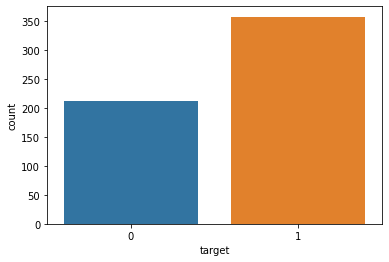

In [9]:
sns.countplot(x = df['target'])

# Model Training

In [10]:
x = df.iloc[:,:-1]  # x =df.drop('target',inplace = True)
y = df.iloc[:,-1]   # y = df['target']

In [11]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=6,stratify=y)

In [12]:
# create instance of model
dt_clr_model = DecisionTreeClassifier(random_state=6)
dt_clr_model.fit(x_train,y_train)

DecisionTreeClassifier(random_state=6)

# Model Evolution

In [13]:
# Training Data

y_pred_tr = dt_clr_model.predict(x_train)

cf_matrix = confusion_matrix(y_train,y_pred_tr)
print('confusion matrix :\n',cf_matrix)
print("*"*80)
accuracy = accuracy_score(y_train,y_pred_tr)
print('accuracy :',accuracy)
print("*"*80)
clf_report = classification_report(y_train,y_pred_tr)
print("classification report :",clf_report)

confusion matrix :
 [[159   0]
 [  0 267]]
********************************************************************************
accuracy : 1.0
********************************************************************************
classification report :               precision    recall  f1-score   support

           0       1.00      1.00      1.00       159
           1       1.00      1.00      1.00       267

    accuracy                           1.00       426
   macro avg       1.00      1.00      1.00       426
weighted avg       1.00      1.00      1.00       426



In [14]:
# Testing Data
y_pred = dt_clr_model.predict(x_test)

matrix = confusion_matrix(y_test,y_pred)
print("confusion matrix-->\n",matrix)
print('*'*80)
accuracy = accuracy_score(y_test,y_pred)
print("Accuracy -->",accuracy)
print('*'*80)
cf_report = classification_report(y_test,y_pred)
print("classification report-->",cf_report)

confusion matrix-->
 [[50  3]
 [ 3 87]]
********************************************************************************
Accuracy --> 0.958041958041958
********************************************************************************
classification report-->               precision    recall  f1-score   support

           0       0.94      0.94      0.94        53
           1       0.97      0.97      0.97        90

    accuracy                           0.96       143
   macro avg       0.96      0.96      0.96       143
weighted avg       0.96      0.96      0.96       143



# Plot decision tree

In [15]:
plt.figure(figsize=(200,150))
plot_tree(dt_clr_model, feature_names=x.columns, class_names=['0','1'], filled=True)
print()
plt.savefig("Decision_tree_without_hyp.png")

# Hyperparametric tunnig

In [16]:
import time
t1 = time.time()

dt_clr_model = DecisionTreeClassifier()

criterion='gini',
max_depth=None,
min_samples_split=2,
min_samples_leaf=1,

hyperparameter = {"criterion":['gini', 'entropy'],
                 'max_depth':np.arange(3,8),
                 'min_samples_split': np.arange(2,20),
                 'min_samples_leaf':np.arange(2,15)}

gscv_dt_clf_model = GridSearchCV(dt_clr_model, hyperparameter, cv = 5)
gscv_dt_clf_model.fit(x_train, y_train)

t2 = time.time()

print("Time required :",t2-t1)

Time required : 64.6909921169281


In [17]:
gscv_dt_clf_model.best_estimator_

DecisionTreeClassifier(criterion='entropy', max_depth=7, min_samples_leaf=2,
                       min_samples_split=8)

In [18]:
# Training data evaluation
dt_clr_hp_model = gscv_dt_clf_model.best_estimator_
dt_clr_hp_model.fit(x_train, y_train)
# Training Data

y_pred_tr = dt_clr_hp_model.predict(x_train)

cf_matrix = confusion_matrix(y_train,y_pred_tr)
print('confusion matrix :\n',cf_matrix)
print("*"*80)
accuracy = accuracy_score(y_train,y_pred_tr)
print('accuracy :',accuracy)
print("*"*80)
clf_report = classification_report(y_train,y_pred_tr)
print("classification report :",clf_report)

confusion matrix :
 [[158   1]
 [  4 263]]
********************************************************************************
accuracy : 0.9882629107981221
********************************************************************************
classification report :               precision    recall  f1-score   support

           0       0.98      0.99      0.98       159
           1       1.00      0.99      0.99       267

    accuracy                           0.99       426
   macro avg       0.99      0.99      0.99       426
weighted avg       0.99      0.99      0.99       426



In [19]:
# Testing Data
y_pred = dt_clr_hp_model.predict(x_test)

matrix = confusion_matrix(y_test,y_pred)
print("confusion matrix-->\n",matrix)
print('*'*80)
accuracy = accuracy_score(y_test,y_pred)
print("Accuracy -->",accuracy)
print('*'*80)
cf_report = classification_report(y_test,y_pred)
print("classification report-->",cf_report)

confusion matrix-->
 [[52  1]
 [ 2 88]]
********************************************************************************
Accuracy --> 0.9790209790209791
********************************************************************************
classification report-->               precision    recall  f1-score   support

           0       0.96      0.98      0.97        53
           1       0.99      0.98      0.98        90

    accuracy                           0.98       143
   macro avg       0.98      0.98      0.98       143
weighted avg       0.98      0.98      0.98       143



# Plot decision tree

In [20]:
plt.figure(figsize=(200,150))
plot_tree(dt_clr_hp_model, feature_names=x.columns, class_names=['0','1'], filled=True)
print()
plt.savefig("Decision_tree_with_hyp.png")

# Prunning

Cutting the branches of tree which is having less importance to imporve performance of the tree model

Types of Prunning:
    1. Pre Prunning (HyperparameterTunning)
    2. Post Prunning (CCP_alpha)
    
    
ccp_alpha=0.0  --> Cost Complexity Prunning

In [21]:
dt_clf_pp_model = DecisionTreeClassifier(random_state=6)
dt_clf_pp_model.fit(x_train, y_train)

DecisionTreeClassifier(random_state=6)

In [22]:
# Training Data

y_pred_tr = dt_clf_pp_model.predict(x_train)

cf_matrix = confusion_matrix(y_train,y_pred_tr)
print('confusion matrix :\n',cf_matrix)
print("*"*80)
accuracy = accuracy_score(y_train,y_pred_tr)
print('accuracy :',accuracy)
print("*"*80)
clf_report = classification_report(y_train,y_pred_tr)
print("classification report :",clf_report)

confusion matrix :
 [[159   0]
 [  0 267]]
********************************************************************************
accuracy : 1.0
********************************************************************************
classification report :               precision    recall  f1-score   support

           0       1.00      1.00      1.00       159
           1       1.00      1.00      1.00       267

    accuracy                           1.00       426
   macro avg       1.00      1.00      1.00       426
weighted avg       1.00      1.00      1.00       426



In [23]:
# Testing Data
y_pred = dt_clf_pp_model.predict(x_test)

matrix = confusion_matrix(y_test,y_pred)
print("confusion matrix-->\n",matrix)
print('*'*80)
accuracy = accuracy_score(y_test,y_pred)
print("Accuracy -->",accuracy)
print('*'*80)
cf_report = classification_report(y_test,y_pred)
print("classification report-->",cf_report)

confusion matrix-->
 [[50  3]
 [ 3 87]]
********************************************************************************
Accuracy --> 0.958041958041958
********************************************************************************
classification report-->               precision    recall  f1-score   support

           0       0.94      0.94      0.94        53
           1       0.97      0.97      0.97        90

    accuracy                           0.96       143
   macro avg       0.96      0.96      0.96       143
weighted avg       0.96      0.96      0.96       143



# Cost Complexity Prunning

In [24]:
output = dt_clf_pp_model.cost_complexity_pruning_path(x_train, y_train)
ccp_alpha_list = output['ccp_alphas']
ccp_alpha_list

array([0.        , 0.00233739, 0.00307932, 0.00435949, 0.00456248,
       0.0046237 , 0.0056338 , 0.00653009, 0.00708417, 0.00938967,
       0.01679062, 0.01988145, 0.04896568, 0.32150592])

In [25]:
train_accuracy_list = []
test_accuracy_list = []

for i in ccp_alpha_list:
    dt_clf_pp_model = DecisionTreeClassifier(ccp_alpha= i,random_state=10)
    dt_clf_pp_model.fit(x_train, y_train)
    
    training_accuracy = dt_clf_pp_model.score(x_train, y_train)
    train_accuracy_list.append(training_accuracy)
    
    testing_Accuracy = dt_clf_pp_model.score(x_test, y_test)
    test_accuracy_list.append(testing_Accuracy)
    

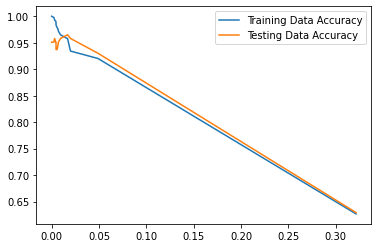

In [26]:
fig, ax = plt.subplots()
ax.plot(ccp_alpha_list, train_accuracy_list, label = "Training Data Accuracy")
ax.plot(ccp_alpha_list, test_accuracy_list, label = "Testing Data Accuracy")
ax.legend()

In [27]:
index_ccp = test_accuracy_list.index(max(test_accuracy_list))
index_ccp

10

In [28]:
best_ccp = ccp_alpha_list[index_ccp]

In [29]:
dt_clf_pp_model = DecisionTreeClassifier(ccp_alpha= best_ccp,random_state=6)
dt_clf_pp_model.fit(x_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.016790621225742625, random_state=6)

In [30]:
# Training Data

y_pred_tr = dt_clf_pp_model.predict(x_train)

cf_matrix = confusion_matrix(y_train,y_pred_tr)
print('confusion matrix :\n',cf_matrix)
print("*"*80)
accuracy = accuracy_score(y_train,y_pred_tr)
print('accuracy :',accuracy)
print("*"*80)
clf_report = classification_report(y_train,y_pred_tr)
print("classification report :",clf_report)

confusion matrix :
 [[152   7]
 [ 11 256]]
********************************************************************************
accuracy : 0.9577464788732394
********************************************************************************
classification report :               precision    recall  f1-score   support

           0       0.93      0.96      0.94       159
           1       0.97      0.96      0.97       267

    accuracy                           0.96       426
   macro avg       0.95      0.96      0.96       426
weighted avg       0.96      0.96      0.96       426



In [31]:
# Testing Data
y_pred = dt_clf_pp_model.predict(x_test)

matrix = confusion_matrix(y_test,y_pred)
print("confusion matrix-->\n",matrix)
print('*'*80)
accuracy = accuracy_score(y_test,y_pred)
print("Accuracy -->",accuracy)
print('*'*80)
cf_report = classification_report(y_test,y_pred)
print("classification report-->",cf_report)

confusion matrix-->
 [[51  2]
 [ 3 87]]
********************************************************************************
Accuracy --> 0.965034965034965
********************************************************************************
classification report-->               precision    recall  f1-score   support

           0       0.94      0.96      0.95        53
           1       0.98      0.97      0.97        90

    accuracy                           0.97       143
   macro avg       0.96      0.96      0.96       143
weighted avg       0.97      0.97      0.97       143



# Plot decision tree

In [32]:
plt.figure(figsize=(200,150))
plot_tree(dt_clf_pp_model, feature_names=x.columns, class_names=['0','1'], filled=True)
print()
plt.savefig("Decision_tree_with_prunning.png")

In [34]:
import pickle
import json

In [38]:
columns = x.columns
columns

Index(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error',
       'worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry', 'worst fractal dimension'],
      dtype='object')

In [39]:
project_data = {"columns":list(columns)}
project_data

{'columns': ['mean radius',
  'mean texture',
  'mean perimeter',
  'mean area',
  'mean smoothness',
  'mean compactness',
  'mean concavity',
  'mean concave points',
  'mean symmetry',
  'mean fractal dimension',
  'radius error',
  'texture error',
  'perimeter error',
  'area error',
  'smoothness error',
  'compactness error',
  'concavity error',
  'concave points error',
  'symmetry error',
  'fractal dimension error',
  'worst radius',
  'worst texture',
  'worst perimeter',
  'worst area',
  'worst smoothness',
  'worst compactness',
  'worst concavity',
  'worst concave points',
  'worst symmetry',
  'worst fractal dimension']}

In [35]:
with open("dt_clf_model.pkl","wb") as f:
    pickle.dump(dt_clf_pp_model,f)

In [40]:
with open("project_data","w") as f:
    json.dump(project_data,f)
    

In [42]:
x.head(1).T

0
mean radius                17.990000
mean texture               10.380000
mean perimeter            122.800000
mean area                1001.000000
mean smoothness             0.118400
mean compactness            0.277600
mean concavity              0.300100
mean concave points         0.147100
mean symmetry               0.241900
mean fractal dimension      0.078710
radius error                1.095000
texture error               0.905300
perimeter error             8.589000
area error                153.400000
smoothness error            0.006399
compactness error           0.049040
concavity error             0.053730
concave points error        0.015870
symmetry error              0.030030
fractal dimension error     0.006193
worst radius               25.380000
worst texture              17.330000
worst perimeter           184.600000
worst area               2019.000000
worst smoothness            0.162200
worst compactness           0.665600
worst concavity             0.711900
worst concave points        0.265400
worst symmetry              0.460100
worst fractal dimension     0.118900